# Предсказание цен на недвижимость


Построить модель предсказания цены ( price_doc ), метрика RMSLE

In [4]:
#подключение библиотек необходимых для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#pd.set_option('display.max_columns', 500)
from sklearn.impute import SimpleImputer
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, r2_score

In [54]:
#загрузка обучающего df
train_df = pd.read_csv('train.csv', index_col=0, parse_dates=['timestamp'], encoding='utf-8')

In [55]:
#загрузка тестового df
test_df = pd.read_csv('test.csv', parse_dates=['timestamp'], encoding='utf-8')

In [56]:
train_df.shape

(30471, 291)

In [57]:
test_df.shape

(7662, 291)

In [58]:
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [59]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [60]:
train_df.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,3.047100e+04,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,1.765705e+07,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,2.064961e+07,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,7.307411e+06,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,1.803644e+07,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 1 to 30473
Columns: 291 entries, timestamp to price_doc
dtypes: datetime64[ns](1), float64(119), int64(156), object(15)
memory usage: 67.9+ MB


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 291 entries, id to market_count_5000
dtypes: datetime64[ns](1), float64(116), int64(159), object(15)
memory usage: 17.0+ MB


In [63]:
#можно заметить, что в обучающем и тестовом DF содержится 15 колонок, у которых тип данных - object

In [64]:
#Посмотрим на количество пропусков в данных
pd.isnull(train_df[train_df.columns[train_df.isnull().any()].tolist()]).sum().sort_values(ascending=False)

hospital_beds_raion                      14441
build_year                               13605
state                                    13559
cafe_sum_500_max_price_avg               13281
cafe_sum_500_min_price_avg               13281
cafe_avg_price_500                       13281
max_floor                                 9572
material                                  9572
num_room                                  9572
kitch_sq                                  9572
preschool_quota                           6688
school_quota                              6685
cafe_avg_price_1000                       6524
cafe_sum_1000_max_price_avg               6524
cafe_sum_1000_min_price_avg               6524
life_sq                                   6383
raion_build_count_with_builddate_info     4991
build_count_after_1995                    4991
build_count_1946-1970                     4991
build_count_1921-1945                     4991
build_count_before_1920                   4991
build_count_1

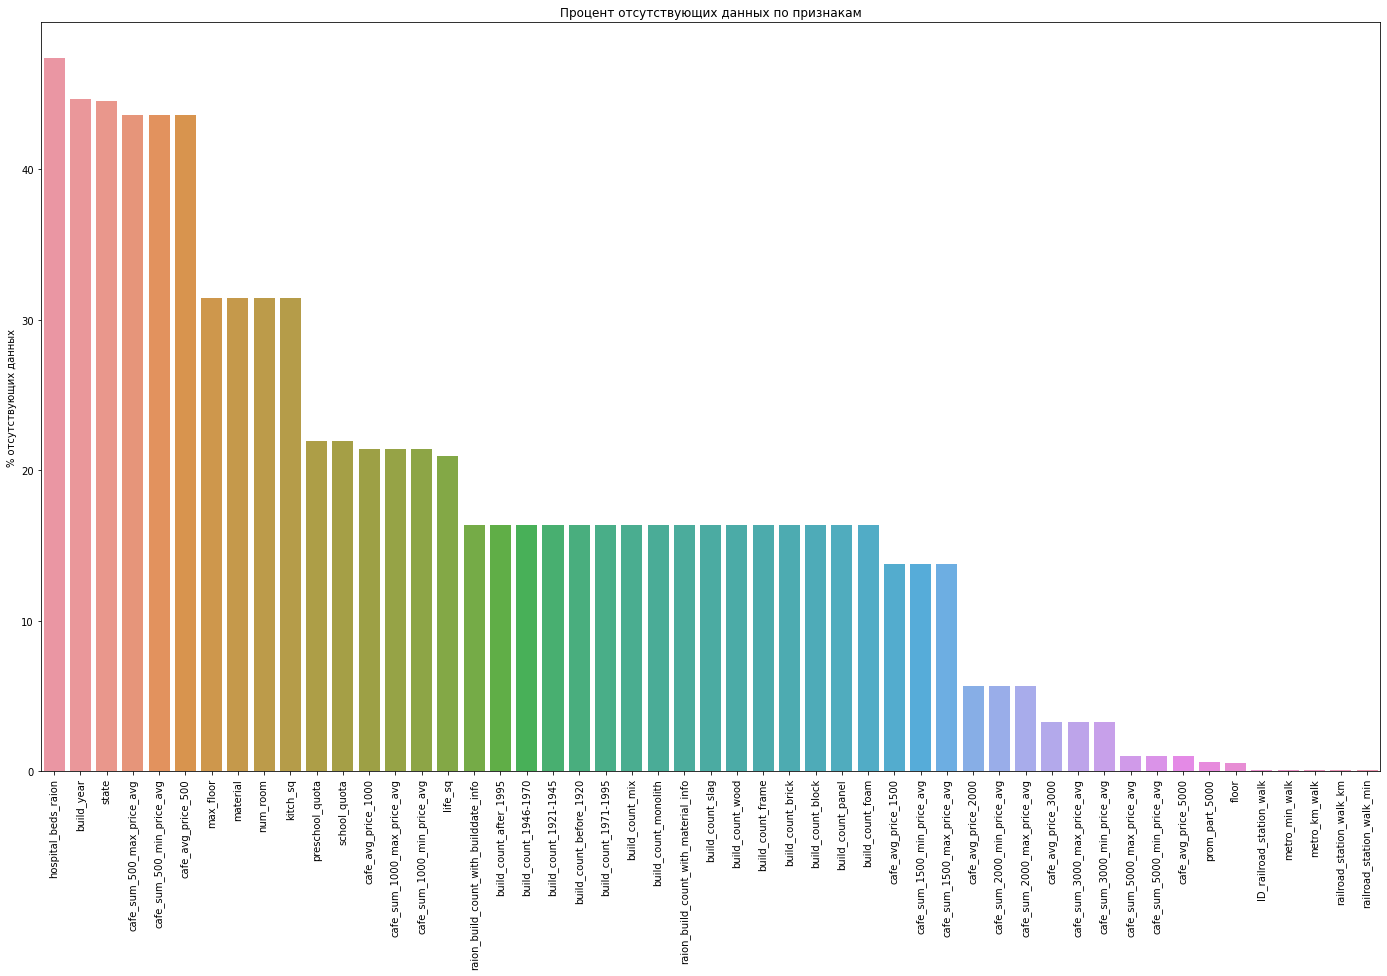

In [65]:
#отобразим отсутсвующие данные
train_na = (train_df.isnull().sum() / len(train_df)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(24, 16))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
ax.set(title='Процент отсутствующих данных по признакам', ylabel='% отсутствующих данных')
plt.subplots_adjust(top = 0.95, bottom = 0.3)
plt.show()

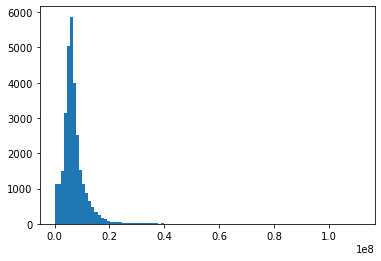

In [66]:
#Так как задача заключается в предсказании цены на квартиру, то посмотрим распределение целевой переменной
plt.hist(train_df['price_doc'], bins = 100)
plt.show()

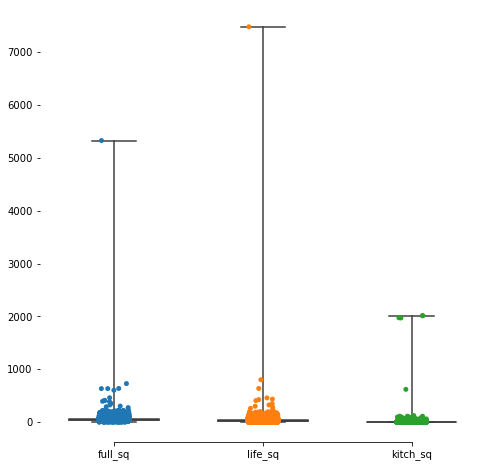

In [67]:
# посмотрим на  зависимость целевой переменной от других признаков для квартиры
#зависимость цены от площади комнат в квартире
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train_df[['full_sq','life_sq','kitch_sq']],whis=[0, 100], width=.6)
sns.stripplot(data=train_df[['full_sq','life_sq','kitch_sq']])
sns.despine(trim=True, left=True)

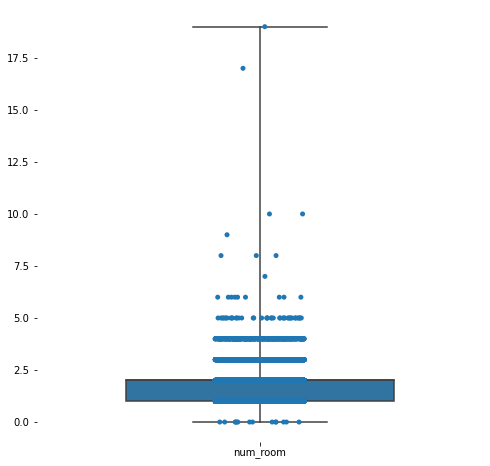

In [68]:
#Зависимость цены от количества комнат
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train_df[['num_room']],whis=[0, 100], width=.6)
sns.stripplot(data=train_df[['num_room']])
sns.despine(trim=True, left=True)

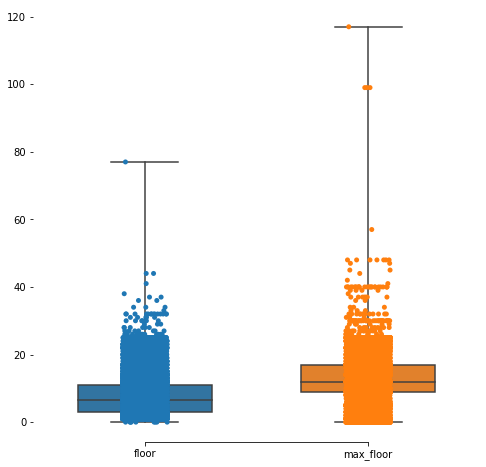

In [69]:
#Зависимость цены от этажа
f, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=train_df[['floor','max_floor']],whis=[0, 100], width=.6)
sns.stripplot(data=train_df[['floor','max_floor']])
sns.despine(trim=True, left=True)

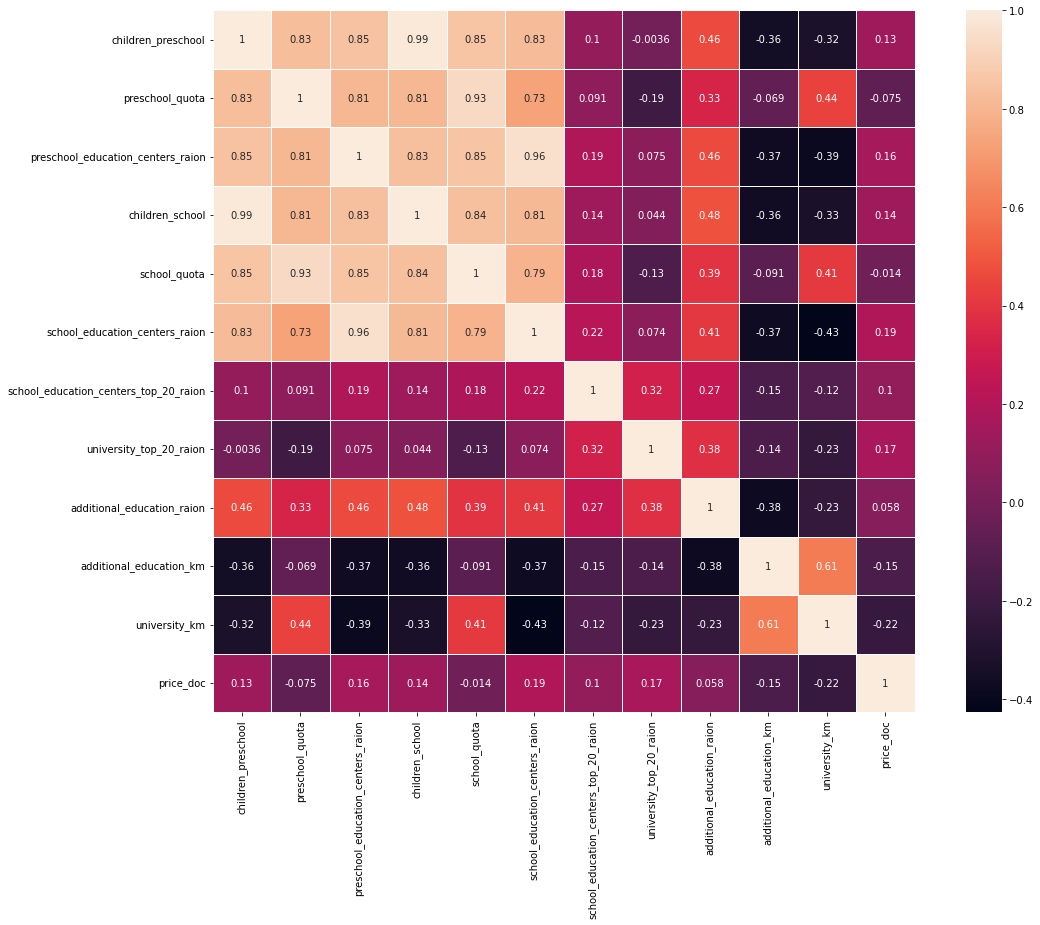

In [70]:
#Посмотрим на корреляцию цены от наличия в районе образовательных учреждений
sp_obj = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
          'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
           'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 
          'university_km', 'price_doc']


matrcorr = train_df[sp_obj].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(matrcorr, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

In [71]:
#наибольшее предпочтение отдается школьным образовательным центрам

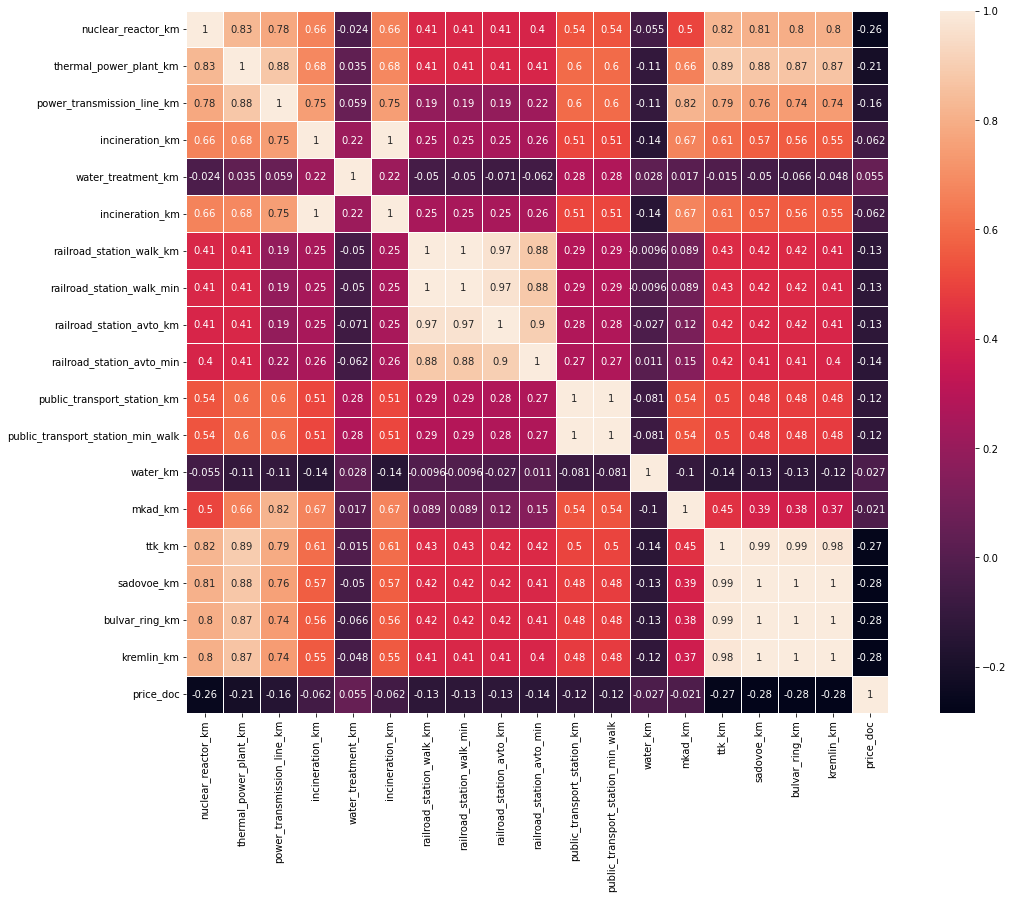

In [72]:
#Посмотрим на корреляцию цены от наличия в районе различной инфраструктуры
sp_obj = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']

matrcorr = train_df[sp_obj].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(matrcorr, square=True, linewidths=.5, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.subplots_adjust(top = 0.95, bottom = 0.3, left = 0.2, right = 1)
plt.show()

In [73]:
#цена на квартиру в даннму случает играет расстояние до водоочистных сооружений. Чем дальше квартира находится от водоочистных сооружений,
#тем она дороже

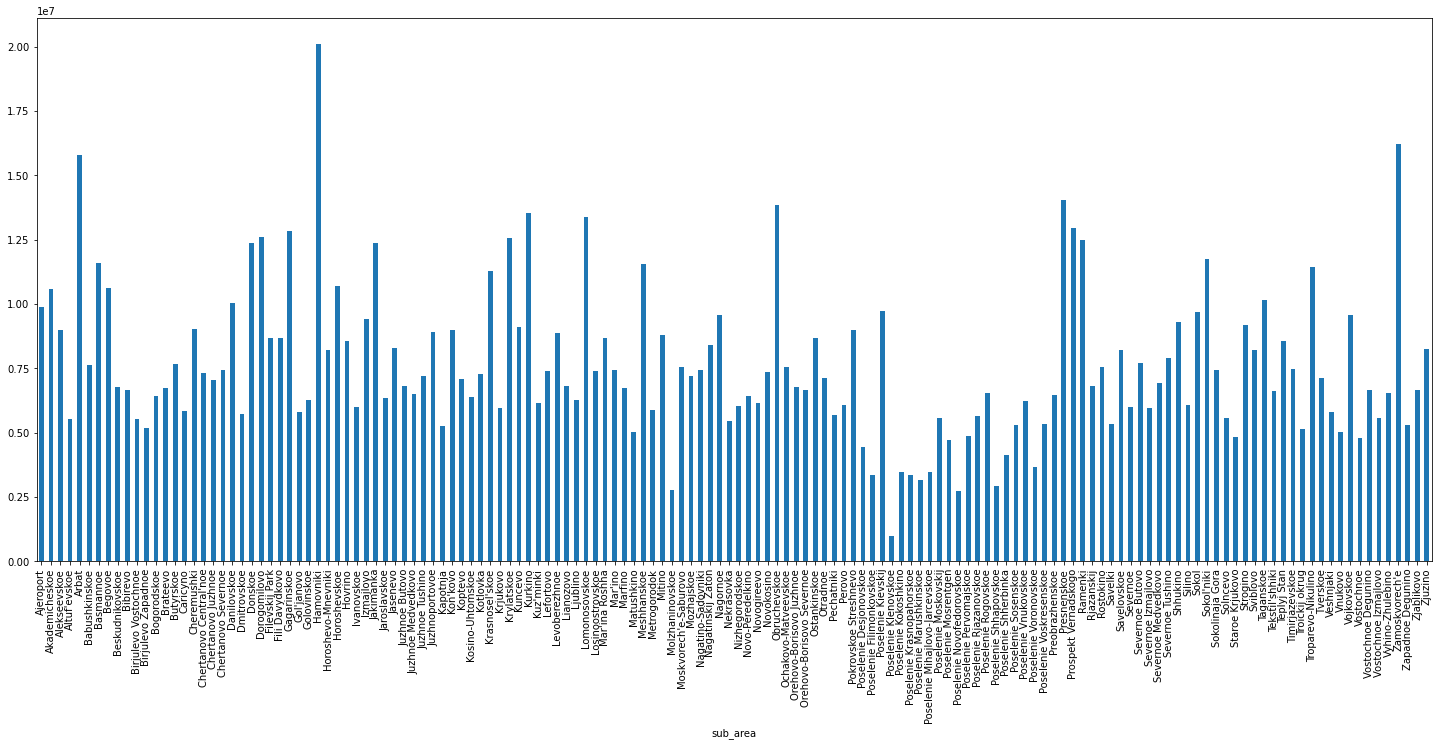

In [74]:
#Посмотрим в каком районе самая высокая средняя цена продажи.
plt.figure(figsize=(25,10))
train_df.price_doc.groupby(train_df.sub_area).mean().plot.bar()
plt.show()

In [75]:
#исходя из построенной гистограммы, видно что,
#самая высокая средняя цена в Хамовниках, а самая низкая средняя цена - поселение Кленовское

## Разделение и очистка данных

In [76]:
train_df.head()

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [77]:
test_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.0,20.7,2,9,1,1998.0,1,8.9,...,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.2,NaN,8,17,1,0.0,3,1.0,...,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.5,25.1,3,5,2,1960.0,2,4.8,...,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.8,36.0,17,17,1,2016.0,2,62.8,...,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.0,40.0,17,17,1,0.0,1,1.0,...,5,1,1,0,2,12,0,1,11,1


In [78]:
#Удалю признаки не содержащие информации
drop = ['timestamp','ID_metro', 
        'raion_build_count_with_material_info',
        'raion_build_count_with_builddate_info',
        'ID_railroad_station_walk', "ID_railroad_station_avto",
        "ID_big_road1", "ID_big_road2", "ID_railroad_terminal",
        "ID_bus_terminal"]
for i in drop:
    train_df = train_df.drop(i, axis=1)
    test_df = test_df.drop(i, axis=1)

In [79]:
train_df.shape, test_df.shape

((30471, 281), (7662, 281))

In [80]:
#функция очистки и разделения данных 
def clearing_df(df):
    # приравнивание жилой площади к общей, там где она превышает общую
    bad_index = df[df.life_sq > df.full_sq].index
    df.loc[bad_index, "life_sq"] = np.NaN
    
    # исправляем площадь кухни где она больше общей площади
    bad_index = df[df['full_sq'] < df['kitch_sq']].index
    df.loc[bad_index, ['kitch_sq']] = np.NaN
    
     # исправление ошибки в данных по состоянию квартиры
    df['state'] = df['state'].replace(33,3)
    
    # исправляем слишком большие и маленькие годы постройки
    df.loc[df['build_year']<1900, 'build_year'] = np.NaN
    df.loc[df['build_year']>2023, 'build_year'] = np.NaN
    
    # приравнивание этажности здания к этажу объекта там где она меньше
    bad_index = df[df['max_floor'] < df['floor']].index
    df.loc[bad_index, ['max_floor']] = df.loc[bad_index, ['floor']]
    
    # исправление данных, где количество комнат равно 0
    bad_index = df[df.num_room == 0].index
    df.loc[bad_index, "num_room"] = np.NaN
    
    # исправление данных, где количество этажей равно 0 
    bad_index = df[df.floor == 0].index
    df.loc[bad_index, "floor"] = np.NaN
    bad_index = df[df.max_floor == 0].index
    df.loc[bad_index, "max_floor"] = np.NaN
    
    
    return df

In [81]:
clear_train_df = clearing_df(train_df)
clear_test_df = clearing_df(test_df)

In [82]:
id_test = test_df['id']
test_df.drop(['id'], axis=1, inplace=True)

In [83]:
#отберу категориальные и числовые признаки и сделаю замену пропусков
categ_pr = clear_train_df.dtypes[clear_train_df.dtypes == "object"].index
categ_pr

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [84]:
int_pr = [i for i in clear_train_df.columns if i not in categ_pr]
int_pr[:5]

['full_sq', 'life_sq', 'floor', 'max_floor', 'material']

In [85]:
categ_pr_t = clear_test_df.dtypes[clear_test_df.dtypes == "object"].index
categ_pr_t

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [86]:
int_pr_t = [i for i in clear_test_df.columns if i not in categ_pr_t]
int_pr_t[:5]

['full_sq', 'life_sq', 'floor', 'max_floor', 'material']

In [87]:
def SimpleImputer_train(data):
    SIm_f = SimpleImputer(strategy='most_frequent')
    SImedian = SimpleImputer(strategy='median')
    categ_pr_train = pd.DataFrame(SIm_f.fit_transform(data[categ_pr]), columns=categ_pr)
    categ_pr_train = categ_pr_train.astype(data[categ_pr].dtypes)
    int_train = pd.DataFrame(SImedian.fit_transform(data[int_pr]),columns=int_pr)
    int_train = int_train.astype(data[int_pr].dtypes)
    SItrain = pd.concat([int_train, categ_pr_train], axis=1)
    
    return SItrain

In [88]:
def SimpleImputer_test(data):
    SIm_f = SimpleImputer(strategy='most_frequent')
    SImedian = SimpleImputer(strategy='median')
    categ_pr_test = pd.DataFrame(SIm_f.fit_transform(data[categ_pr_t]), columns=categ_pr_t)
    categ_pr_test = categ_pr_test.astype(data[categ_pr_t].dtypes)
    int_test = pd.DataFrame(SImedian.fit_transform(data[int_pr_t]),columns=int_pr_t)
    int_test = int_test.astype(data[int_pr_t].dtypes)
    SItest = pd.concat([int_test, categ_pr_test], axis=1)
    
    return SItest

In [89]:
train_df_SI = SimpleImputer_train(clear_train_df)
train_df_SI.isna().sum().sort_values(ascending=False)

full_sq                       0
cafe_count_1500_price_1000    0
church_count_1500             0
big_church_count_1500         0
cafe_count_1500_price_high    0
                             ..
radiation_km                  0
power_transmission_line_km    0
thermal_power_plant_km        0
ts_km                         0
ecology                       0
Length: 281, dtype: int64

In [90]:
test_df_SI =SimpleImputer_test(clear_test_df)
test_df_SI.isna().sum().sort_values(ascending=False)

full_sq                       0
cafe_count_1500_price_500     0
big_church_count_1500         0
cafe_count_1500_price_high    0
cafe_count_1500_price_4000    0
                             ..
nuclear_reactor_km            0
radiation_km                  0
power_transmission_line_km    0
thermal_power_plant_km        0
ecology                       0
Length: 280, dtype: int64

In [91]:
#так как в DF содержатся категориальные признаки, необходимо перекодировать их в числовые
# использую One Hot Encoder
def One_Hot_Encoder_DF_train(data):
    categ_pr = data.dtypes[data.dtypes == "object"].index
    OHE = OneHotEncoder()
    encoder_cols = pd.DataFrame(OHE.fit_transform(data[categ_pr]).toarray())
    encoder_cols.columns = OHE.get_feature_names(categ_pr)
    encoder_cols.index = data.index
    num_df = data.drop(categ_pr, axis=1)
    df_train = pd.concat([num_df, encoder_cols], axis=1)
    
    return df_train

In [92]:
def One_Hot_Encoder_DF_test(data):
    categ_pr = data.dtypes[data.dtypes == "object"].index
    OHE = OneHotEncoder()
    encoder_cols = pd.DataFrame(OHE.fit_transform(data[categ_pr]).toarray())
    encoder_cols.columns = OHE.get_feature_names(categ_pr)
    encoder_cols.index = data.index
    num_df = data.drop(categ_pr, axis=1)
    df_test = pd.concat([num_df, encoder_cols], axis=1)
    
    return df_test

In [93]:
train_DF = One_Hot_Encoder_DF_train(train_df_SI)

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [94]:
train_DF.isna().sum().sort_values(ascending=False)

full_sq                      0
sub_area_Dorogomilovo        0
sub_area_Izmajlovo           0
sub_area_Ivanovskoe          0
sub_area_Hovrino             0
                            ..
big_church_count_500         0
cafe_count_500_price_high    0
cafe_count_500_price_4000    0
cafe_count_500_price_2500    0
ecology_satisfactory         0
Length: 443, dtype: int64

In [95]:
test_DF = One_Hot_Encoder_DF_test(test_df_SI)

C:\Users\Tsvet\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [96]:
test_DF.isna().sum().sort_values(ascending=False)

full_sq                      0
sub_area_Dorogomilovo        0
sub_area_Izmajlovo           0
sub_area_Ivanovskoe          0
sub_area_Hovrino             0
                            ..
big_church_count_500         0
cafe_count_500_price_high    0
cafe_count_500_price_4000    0
cafe_count_500_price_2500    0
ecology_satisfactory         0
Length: 441, dtype: int64

In [97]:
train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 443 entries, full_sq to ecology_satisfactory
dtypes: float64(293), int64(150)
memory usage: 103.0 MB


In [98]:
test_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Columns: 441 entries, full_sq to ecology_satisfactory
dtypes: float64(292), int64(149)
memory usage: 25.8 MB


In [99]:
#сохраню обработанный DF для дальнейшего использования
train_DF.to_csv('processed_train_DF.csv', index=False)

In [100]:
y = train_DF['price_doc']

In [101]:
X = train_DF.drop(['price_doc','sub_area_Poselenie Klenovskoe'], axis=1)
print(X.shape)
print(y.shape)

(30471, 441)
(30471,)


In [102]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

X_test = test_DF

In [2]:
from catboost import CatBoostRegressor

In [104]:
model = CatBoostRegressor(random_state=42)

In [105]:
model.fit(X_train, y_train)

Learning rate set to 0.06594
0:	learn: 4707711.9198857	total: 327ms	remaining: 5m 26s
1:	learn: 4559068.1780647	total: 399ms	remaining: 3m 18s
2:	learn: 4427088.0233429	total: 494ms	remaining: 2m 44s
3:	learn: 4302795.1501632	total: 695ms	remaining: 2m 52s
4:	learn: 4189045.4982419	total: 781ms	remaining: 2m 35s
5:	learn: 4082991.3445458	total: 903ms	remaining: 2m 29s
6:	learn: 3988892.7682186	total: 991ms	remaining: 2m 20s
7:	learn: 3892041.1011047	total: 1.08s	remaining: 2m 13s
8:	learn: 3810100.8063241	total: 1.17s	remaining: 2m 9s
9:	learn: 3726284.1262135	total: 1.36s	remaining: 2m 14s
10:	learn: 3657402.1052402	total: 1.49s	remaining: 2m 14s
11:	learn: 3593428.5757400	total: 1.59s	remaining: 2m 10s
12:	learn: 3534681.0722764	total: 1.68s	remaining: 2m 7s
13:	learn: 3482268.7693652	total: 1.75s	remaining: 2m 3s
14:	learn: 3434668.8338824	total: 1.89s	remaining: 2m 4s
15:	learn: 3386676.3996337	total: 2.05s	remaining: 2m 6s
16:	learn: 3342327.4153137	total: 2.18s	remaining: 2m 6s
1

142:	learn: 2436539.5606024	total: 16.8s	remaining: 1m 40s
143:	learn: 2434794.7312968	total: 16.9s	remaining: 1m 40s
144:	learn: 2432180.0628532	total: 17.1s	remaining: 1m 40s
145:	learn: 2430396.1827938	total: 17.2s	remaining: 1m 40s
146:	learn: 2427299.0725396	total: 17.3s	remaining: 1m 40s
147:	learn: 2423896.2995194	total: 17.4s	remaining: 1m 40s
148:	learn: 2421432.2779234	total: 17.5s	remaining: 1m 40s
149:	learn: 2421038.5415143	total: 17.7s	remaining: 1m 40s
150:	learn: 2418773.5589485	total: 17.8s	remaining: 1m 40s
151:	learn: 2417807.3636388	total: 18s	remaining: 1m 40s
152:	learn: 2416454.0666428	total: 18.1s	remaining: 1m 40s
153:	learn: 2412342.7950528	total: 18.2s	remaining: 1m 39s
154:	learn: 2409528.7231761	total: 18.3s	remaining: 1m 39s
155:	learn: 2405086.3745024	total: 18.4s	remaining: 1m 39s
156:	learn: 2402843.0926680	total: 18.6s	remaining: 1m 39s
157:	learn: 2400198.2911073	total: 18.7s	remaining: 1m 39s
158:	learn: 2397374.2568087	total: 18.8s	remaining: 1m 39s

283:	learn: 2214399.8115448	total: 33.3s	remaining: 1m 23s
284:	learn: 2212657.1207157	total: 33.4s	remaining: 1m 23s
285:	learn: 2211680.5176648	total: 33.5s	remaining: 1m 23s
286:	learn: 2210471.4315340	total: 33.6s	remaining: 1m 23s
287:	learn: 2208985.5337883	total: 33.8s	remaining: 1m 23s
288:	learn: 2208132.9855628	total: 33.9s	remaining: 1m 23s
289:	learn: 2206979.0989730	total: 34s	remaining: 1m 23s
290:	learn: 2205445.0220929	total: 34.2s	remaining: 1m 23s
291:	learn: 2204271.4557448	total: 34.4s	remaining: 1m 23s
292:	learn: 2203090.4798063	total: 34.6s	remaining: 1m 23s
293:	learn: 2202264.1801997	total: 34.7s	remaining: 1m 23s
294:	learn: 2200919.2251322	total: 34.8s	remaining: 1m 23s
295:	learn: 2200205.0471157	total: 34.9s	remaining: 1m 23s
296:	learn: 2198103.7460679	total: 35.1s	remaining: 1m 23s
297:	learn: 2197821.8630620	total: 35.2s	remaining: 1m 22s
298:	learn: 2196392.7334503	total: 35.3s	remaining: 1m 22s
299:	learn: 2194636.5733354	total: 35.5s	remaining: 1m 22s

423:	learn: 2061261.0685786	total: 50.3s	remaining: 1m 8s
424:	learn: 2061140.0468719	total: 50.4s	remaining: 1m 8s
425:	learn: 2060116.1604934	total: 50.5s	remaining: 1m 8s
426:	learn: 2058040.9125547	total: 50.7s	remaining: 1m 7s
427:	learn: 2057773.1051600	total: 50.8s	remaining: 1m 7s
428:	learn: 2056689.9112904	total: 50.9s	remaining: 1m 7s
429:	learn: 2056172.6776632	total: 51s	remaining: 1m 7s
430:	learn: 2054853.7297833	total: 51.2s	remaining: 1m 7s
431:	learn: 2053741.6068606	total: 51.3s	remaining: 1m 7s
432:	learn: 2053176.8526936	total: 51.4s	remaining: 1m 7s
433:	learn: 2052232.6185721	total: 51.6s	remaining: 1m 7s
434:	learn: 2051349.8119840	total: 51.7s	remaining: 1m 7s
435:	learn: 2050020.8604500	total: 51.8s	remaining: 1m 7s
436:	learn: 2049084.6782166	total: 52s	remaining: 1m 6s
437:	learn: 2048026.1689814	total: 52.1s	remaining: 1m 6s
438:	learn: 2047729.8375706	total: 52.1s	remaining: 1m 6s
439:	learn: 2047491.8885800	total: 52.2s	remaining: 1m 6s
440:	learn: 204638

568:	learn: 1948203.9568718	total: 1m 7s	remaining: 50.9s
569:	learn: 1947699.5616783	total: 1m 7s	remaining: 50.8s
570:	learn: 1947160.6991368	total: 1m 7s	remaining: 50.6s
571:	learn: 1946465.2324713	total: 1m 7s	remaining: 50.5s
572:	learn: 1945671.8893741	total: 1m 7s	remaining: 50.4s
573:	learn: 1945055.2522201	total: 1m 7s	remaining: 50.2s
574:	learn: 1944623.0385970	total: 1m 7s	remaining: 50.1s
575:	learn: 1943677.6355198	total: 1m 7s	remaining: 50s
576:	learn: 1943253.4921226	total: 1m 7s	remaining: 49.8s
577:	learn: 1943198.3645405	total: 1m 8s	remaining: 49.7s
578:	learn: 1942589.8678664	total: 1m 8s	remaining: 49.6s
579:	learn: 1941798.5911119	total: 1m 8s	remaining: 49.4s
580:	learn: 1940989.7139907	total: 1m 8s	remaining: 49.3s
581:	learn: 1940041.9564811	total: 1m 8s	remaining: 49.2s
582:	learn: 1939553.7718114	total: 1m 8s	remaining: 49s
583:	learn: 1938638.3533548	total: 1m 8s	remaining: 48.9s
584:	learn: 1938096.3337958	total: 1m 8s	remaining: 48.8s
585:	learn: 193747

708:	learn: 1863099.9870324	total: 1m 21s	remaining: 33.4s
709:	learn: 1862761.8509850	total: 1m 21s	remaining: 33.3s
710:	learn: 1862385.0660126	total: 1m 21s	remaining: 33.2s
711:	learn: 1861510.6936146	total: 1m 21s	remaining: 33.1s
712:	learn: 1860981.0376123	total: 1m 21s	remaining: 33s
713:	learn: 1859907.2213632	total: 1m 21s	remaining: 32.8s
714:	learn: 1858594.2023975	total: 1m 22s	remaining: 32.7s
715:	learn: 1858373.0249139	total: 1m 22s	remaining: 32.6s
716:	learn: 1857802.5605941	total: 1m 22s	remaining: 32.5s
717:	learn: 1857777.2754371	total: 1m 22s	remaining: 32.4s
718:	learn: 1857268.7254606	total: 1m 22s	remaining: 32.3s
719:	learn: 1857244.1780209	total: 1m 22s	remaining: 32.1s
720:	learn: 1856457.3454223	total: 1m 22s	remaining: 32s
721:	learn: 1855824.9570141	total: 1m 22s	remaining: 31.9s
722:	learn: 1855320.6907753	total: 1m 22s	remaining: 31.8s
723:	learn: 1855102.8198887	total: 1m 23s	remaining: 31.7s
724:	learn: 1854820.9549235	total: 1m 23s	remaining: 31.5s
7

848:	learn: 1794444.5588111	total: 1m 35s	remaining: 17.1s
849:	learn: 1793849.1109783	total: 1m 35s	remaining: 16.9s
850:	learn: 1793366.6748756	total: 1m 36s	remaining: 16.8s
851:	learn: 1792734.3383518	total: 1m 36s	remaining: 16.7s
852:	learn: 1792331.6147581	total: 1m 36s	remaining: 16.6s
853:	learn: 1791629.4768563	total: 1m 36s	remaining: 16.5s
854:	learn: 1790949.4765832	total: 1m 36s	remaining: 16.4s
855:	learn: 1790822.8100121	total: 1m 36s	remaining: 16.3s
856:	learn: 1790429.9571737	total: 1m 36s	remaining: 16.1s
857:	learn: 1790329.5102709	total: 1m 36s	remaining: 16s
858:	learn: 1789694.2428514	total: 1m 36s	remaining: 15.9s
859:	learn: 1789121.9121512	total: 1m 36s	remaining: 15.8s
860:	learn: 1788655.6900237	total: 1m 37s	remaining: 15.7s
861:	learn: 1788032.4433987	total: 1m 37s	remaining: 15.6s
862:	learn: 1787653.5478685	total: 1m 37s	remaining: 15.4s
863:	learn: 1787085.9996217	total: 1m 37s	remaining: 15.3s
864:	learn: 1786834.3434849	total: 1m 37s	remaining: 15.2s

988:	learn: 1730609.3324714	total: 1m 50s	remaining: 1.22s
989:	learn: 1730319.3056004	total: 1m 50s	remaining: 1.11s
990:	learn: 1730062.9738377	total: 1m 50s	remaining: 1s
991:	learn: 1729520.4417398	total: 1m 50s	remaining: 890ms
992:	learn: 1729229.2181020	total: 1m 50s	remaining: 779ms
993:	learn: 1728717.0055005	total: 1m 50s	remaining: 667ms
994:	learn: 1728303.4343197	total: 1m 50s	remaining: 556ms
995:	learn: 1727854.0756259	total: 1m 50s	remaining: 445ms
996:	learn: 1727584.4510453	total: 1m 50s	remaining: 333ms
997:	learn: 1727021.7170861	total: 1m 50s	remaining: 222ms
998:	learn: 1726562.0901301	total: 1m 51s	remaining: 111ms
999:	learn: 1726168.6511973	total: 1m 51s	remaining: 0us


In [106]:
pred = model.predict(X_val)

In [107]:
def My_RMSLE(y_true, y_pred):
    y_pred[y_pred < 0] = 0 # Обнуляет все предсказания меньше 0
    return mean_squared_log_error(y_true, y_pred) ** 0.5

In [108]:
rmsle = My_RMSLE(y_val, pred)

In [109]:
print('rmsle =', rmsle)

rmsle = 0.4894616413630744


In [110]:
predict = model.predict(X_test)

In [111]:
prediction = pd.DataFrame({'id': id_test, 'price_doc': predict})
prediction.head()

,id,price_doc
0,30474,6.064444e+06
1,30475,8.620702e+06
2,30476,5.390347e+06
3,30477,6.083021e+06
4,30478,5.560519e+06


In [112]:
prediction.to_csv('prediction.csv', index=False)

Выбрать наименьшее возможное количество признаков, при котором
качество модели будет сопоставимо с моделью с полным набором признаков

In [113]:
#посмотрим на значимость фичей в df
feature_importance = pd.Series(model.feature_importances_)
feature_names = pd.Series(model.feature_names_)

sorted_idx = feature_importance.argsort()
n_features = len(feature_names)

Text(0.5, 1.0, 'Гистограмма распределения важности признаков')

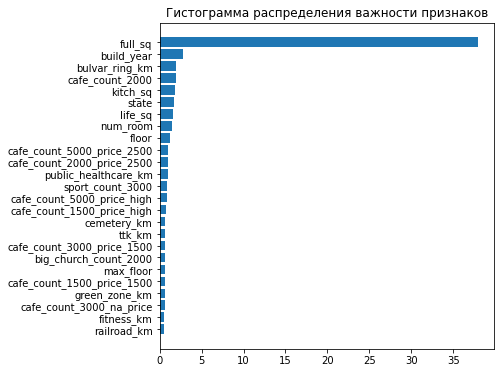

In [114]:
#построю гистограмму распределения важности признаков(фичей) в df
fig = plt.figure(figsize=(6, 6))
plt.barh(feature_names[sorted_idx[-25:]], feature_importance[sorted_idx[-25:]])
plt.title('Гистограмма распределения важности признаков')

In [115]:
score = {}
for i in range(300,0,-20):
    feature_names_i = feature_names[sorted_idx[-i:]].to_list()
    train_df_i = train_DF[feature_names_i]
    y = train_DF['price_doc']
    X_i = train_df_i
    X_train_i, X_val_i, y_train_i, y_val_i = train_test_split(X_i, y, test_size=0.33, random_state=42)
    X_test = test_DF[feature_names_i]
    model.fit(X_train_i, y_train_i)
    pred_i = model.predict(X_val_i)
    rmsle_i = My_RMSLE(y_val_i, pred_i)
    score[len(feature_names_i)] = rmsle_i
    print(f' rmsle_{i} = {rmsle_i}')

Learning rate set to 0.06594
0:	learn: 4722618.2303059	total: 72.7ms	remaining: 1m 12s
1:	learn: 4570227.2699026	total: 142ms	remaining: 1m 10s
2:	learn: 4439107.5233770	total: 265ms	remaining: 1m 27s
3:	learn: 4314127.6711773	total: 425ms	remaining: 1m 45s
4:	learn: 4193996.8533704	total: 569ms	remaining: 1m 53s
5:	learn: 4088907.9039010	total: 631ms	remaining: 1m 44s
6:	learn: 3991789.2280093	total: 707ms	remaining: 1m 40s
7:	learn: 3903511.6126230	total: 782ms	remaining: 1m 37s
8:	learn: 3816486.6429473	total: 926ms	remaining: 1m 41s
9:	learn: 3746158.4677606	total: 1.16s	remaining: 1m 54s
10:	learn: 3677597.6764089	total: 1.25s	remaining: 1m 52s
11:	learn: 3613670.8403013	total: 1.33s	remaining: 1m 49s
12:	learn: 3556234.8655829	total: 1.42s	remaining: 1m 47s
13:	learn: 3499236.8106494	total: 1.54s	remaining: 1m 48s
14:	learn: 3449733.3507692	total: 1.67s	remaining: 1m 49s
15:	learn: 3402241.0868570	total: 1.78s	remaining: 1m 49s
16:	learn: 3358688.0226892	total: 1.89s	remaining: 1

143:	learn: 2412637.2849998	total: 17.6s	remaining: 1m 44s
144:	learn: 2410971.6988915	total: 17.7s	remaining: 1m 44s
145:	learn: 2408464.1840888	total: 17.8s	remaining: 1m 44s
146:	learn: 2406509.8321566	total: 18s	remaining: 1m 44s
147:	learn: 2403596.8534737	total: 18.1s	remaining: 1m 44s
148:	learn: 2402829.5855531	total: 18.2s	remaining: 1m 43s
149:	learn: 2399672.5103301	total: 18.3s	remaining: 1m 43s
150:	learn: 2398588.4251899	total: 18.5s	remaining: 1m 43s
151:	learn: 2398426.9885066	total: 18.5s	remaining: 1m 43s
152:	learn: 2397379.2811192	total: 18.6s	remaining: 1m 42s
153:	learn: 2395966.1493685	total: 18.7s	remaining: 1m 42s
154:	learn: 2395017.6105514	total: 18.8s	remaining: 1m 42s
155:	learn: 2392881.7820652	total: 18.9s	remaining: 1m 42s
156:	learn: 2391402.3105702	total: 19s	remaining: 1m 42s
157:	learn: 2390659.0056809	total: 19.1s	remaining: 1m 41s
158:	learn: 2389573.6851299	total: 19.2s	remaining: 1m 41s
159:	learn: 2388171.2612604	total: 19.3s	remaining: 1m 41s
1

KeyboardInterrupt: 

In [ ]:
df_fith = pd.DataFrame(list(score.items()),
                   columns=['Q_priz', 'RMSLE'])
df_fith

In [ ]:
print("Line graph: ")
plt.plot(df_fith["Q_priz"], df_fith["RMSLE"])
plt.show()

In [ ]:
#из df_fith можно увидеть, что наименьшее возможное количество признаков, при котором качество модели будет 
#сопоставимо с моделью с полным набором признаков составляет около 80 признаков. Исходя из этого обучим модель
#только на 80 фичах по их важности.

In [ ]:
feature_names_i = feature_names[sorted_idx[-80:]].to_list()
train_df_i = train_DF[feature_names_i]
y = train_DF['price_doc']
X_i = train_df_i
X_train_i, X_val_i, y_train_i, y_val_i = train_test_split(X_i, y, test_size=0.33, random_state=42)
X_test = test_DF[feature_names_i]
model.fit(X_train_i, y_train_i)
pred_i = model.predict(X_val_i)
rmsle_i = My_RMSLE(y_val_i, pred_i)
print(rmsle_i)   

In [ ]:
#сохраню модель
model.save_model('my_model_catboost')

In [ ]:
predict = model.predict(X_test)

In [ ]:
prediction_80 = pd.DataFrame({'id': id_test, 'price_doc': predict})
prediction_80.head()

In [ ]:
# результаты для загрузки на kaggle
prediction_80.to_csv('prediction_80.csv', index=False)

Создать веб приложение(на Dash или Streamlit ), которое при указании
параметров предсказывает цену квартиры

In [10]:
df_dash = pd.read_csv('processed_train_DF.csv')
model_dash = CatBoostRegressor()
CatBoostRegressor.load_model(model_dash, 'my_model_catboost')

In [7]:
df_dash['mosque_km']

0         3.932040
1         4.841544
2         7.922152
3        15.300449
4         2.584370
           ...    
30466     1.558875
30467     2.226056
30468    12.652956
30469     2.748055
30470     8.987913
Name: mosque_km, Length: 30471, dtype: float64

In [9]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd
from jupyter_dash import JupyterDash

app = JupyterDash(__name__)

colors = {
    'background': '#a2f59f',
    'text': '#797a64'}

app.layout = html.Div(style={'backgroundColor': colors['background']}, children=[
    html.Div(children=[
        
        html.H1(
            children='Расчет стоимости недвижимости в Москве',
            style={
                'textAlign': 'center',
                'color': '#050505'
            }),
        
        html.Label('Укажите параметры квартиры, для расчета ее стоимости:',
            style={
                'font-size': 20,
                'color': colors['text']})]),
    
        html.Hr(),
    
        html.Label('Общая площадь квартиры:', 
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=10,
            max=1000,
            step=10,
            marks=None,
            value=80,
            id='full_sq',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Жилая площадь:',
            style={
                'font-size': 20,
                'color': colors['text']}),                  
        dcc.Slider(
            min=10,
            max=600,
            step=10,
            marks=None,
            value=60,
            id='life_sq',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Этаж в доме:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=1,
            max=117,
            step=1,
            marks=None,
            value=10,
            id='floor',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Количество этажей в доме:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=1,
            max=117,
            step=1,
            marks=None,
            value=15,
            id='max_floor',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Материал стен:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=1,
            max=6,
            step=1,
            marks=None,
            value=3,
            id='material',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Год постройки дома:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=1850,
            max=2023,
            step=1,
            marks=None,
            value=2010,
            id='build_year',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Количество комнат:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=1,
            max=19,
            step=1,
            marks=None,
            value=3,
            id='num_room',
            tooltip={"placement": "bottom", "always_visible": True}),
        
    
        html.Label('Площадь кухни:', 
            style={
                'font-size': 20,
                'color': colors['text']}),
        dcc.Slider(
            min=10,
            max=100,
            step=10,
            marks=None,
            value=20,
            id='kitch_sq',
            tooltip={"placement": "bottom", "always_visible": True}),
    
        html.Label('Стоимость квартиры:',
            style={
                'font-size': 20,
                'color': colors['text']}),
        html.Div(id='price')

])

@app.callback(
    Output('price', 'children'),
    Input('full_sq', 'value'),
    Input('life_sq', 'value'),
    Input('floor', 'value'),
    Input('max_floor', 'value'),
    Input('material', 'value'),
    Input('build_year', 'value'),
    Input('num_room', 'value'),
    Input('kitch_sq', 'value')  
)

def predict(full_sq, life_sq, floor, max_floor, material, build_year, num_room, kitch_sq):
    
    full_sq = full_sq,
    life_sq = float(life_sq),
    floor = float(floor),
    max_floor = float(max_floor),
    material =  float(material),
    build_year = float(build_year),
    num_room = float(num_room),
    kitch_sq = float(kitch_sq)
    
    data = {
        'full_sq' : full_sq,
        'life_sq' : life_sq,
        'floor' : floor,
        'max_floor' : max_floor,
        'material' : material,
        'build_year' : build_year,
        'num_room' : num_room,
        'kitch_sq' : kitch_sq
            }
    pred_dash = model_dash.predict(pd.DataFrame(data, [0]))
    return pred_dash[0]

if __name__ == '__main__':
    app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



---------------------------------------------------------------------------
CatBoostError                             Traceback (most recent call last)
File ~\anaconda3\lib\site-packages\catboost\core.py:5775, in CatBoostRegressor.predict(
    self=<catboost.core.CatBoostRegressor object>,
    data=   full_sq  life_sq  floor  max_floor  material ... 2010.0       3.0   

   kitch_sq  
0      20.0  ,
    prediction_type='RawFormulaVal',
    ntree_start=0,
    ntree_end=0,
    thread_count=-1,
    verbose=None,
    task_type='CPU'
)
   5773 if prediction_type is None:
   5774     prediction_type = self._get_default_prediction_type()
-> 5775 return self._predict(data, prediction_type, ntree_start, ntree_end, thread_count, verbose, 'predict', task_type)
        prediction_type = 'RawFormulaVal'
        data =    full_sq  life_sq  floor  max_floor  material  build_year  num_room  \
0       80     60.0   10.0       15.0       3.0      2010.0       3.0   

   kitch_sq  
0      20.0  
        n